In [2]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все описания этих вакансий
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [1]:
import requests
import json
#from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
#url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'


In [5]:
#vacancies = res.json()
#num_pages = vacancies.get('pages')
#vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [3]:
from dateutil.parser import parse
strin = '2021-04-13T17:54:51+0300'
dt = parse(strin)
print(dt.isoformat())
print(dt.weekday())

2021-04-13T17:54:51+03:00
1


In [4]:
#Для проверки
def getSkills(id):
    url = f"https://api.hh.ru/vacancies/{id}"
    body = requests.get(url).json().get("key_skills") #[{'name': 'Python'},{'name': 'Tensorflow'},{'name': 'PyTorch'}]
    list_with_skills = list(map(lambda x: x.get("name"), body)) #['Python', 'Tensorflow', 'PyTorch']
    return list_with_skills

getSkills("41137742")

['Python',
 'Tensorflow',
 'PyTorch',
 'Numpy',
 'Kafka',
 'Docker',
 'OpenShift',
 'Jenkins',
 'Ansible',
 'PostgreSQL',
 'GridGain',
 'ELK',
 'Jaeger',
 'Prometheus',
 'Grafana']

In [6]:
def getAllVacansies(city):
    main_df=pd.DataFrame()
    sber = '3529'
    page = 1
    num_per_page = 100
    end = False
    while (not end):
            url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={city}'
    
            res = requests.get(url)
            if (res.status_code == 200):
                #print(page)
                temp_df = make_df(res.json())
                #print(temp_df.shape)
                main_df = pd.concat([main_df, temp_df])
                #print(main_df.shape)
                page += 1
            else:
                end = True
            
    return main_df

def make_df(json):
    vacs_df = pd.DataFrame()
    vacs_df['id'] = [el.get('id') for el in json.get('items')]
    vacs_df['name'] = [el.get('name') for el in json.get('items')]
    vacs_df['published_at'] = [el.get('published_at') for el in json.get('items')]
    vacs_df['responsibility'] = [el.get('snippet').get('responsibility') for el in json.get('items')]
    vacs_df['skills'] = [getSkills(el.get('id')) for el in json.get('items')] #скиллы
     #переводим дату публикации в datetime и номер дня недели 0-пн: 6-вскр
    vacs_df["published_at"] = vacs_df["published_at"].map(lambda x: parse(x))
    vacs_df["published_at_date"] = vacs_df["published_at"].map(lambda x: x.date)
    vacs_df['published_at_wd'] = vacs_df["published_at"].map(lambda x: x.weekday())
    #для понимания добавим город 
    vacs_df['kod_city'] = [el.get('area').get('id') for el in json.get('items')]
    vacs_df['city'] = [el.get('area').get('name') for el in json.get('items')]
    return vacs_df

vacs_df = getAllVacansies(1)

In [9]:
vacs_df.head(10)

,id,name,published_at,responsibility,skills,published_at_date,published_at_wd,kod_city,city
0,44468826,Frontend Developer (Сайт sberbank.ru),2021-05-11 10:31:41+03:00,Разработка фронтальной части крупнейшего банко...,[],2021-05-11,1,1,Москва
1,44468877,Ведущий юрисконсульт отдела защиты интересов Б...,2021-05-11 10:32:41+03:00,Осуществление правового сопровождения сложност...,[],2021-05-11,1,1,Москва
2,44533597,Менеджер по кросс-сейл продажам,2021-05-12 17:25:43+03:00,"Разработка, согласование и внедрение схем посл...","[Подготовка презентаций, MS Visio, телемеркети...",2021-05-12,2,1,Москва
3,44845317,Специалист по коммуникациям. Дивизион «Цифрова...,2021-05-24 17:46:02+03:00,Помощь команде коммуникаций в повышении узнава...,[],2021-05-24,0,1,Москва
4,44281150,Консультант,2021-05-27 14:49:20+03:00,"Узнает, зачем клиент пришел в банк, и направля...",[Консультирование],2021-05-27,3,1,Москва
5,43732367,Руководитель проектов,2021-06-02 14:06:49+03:00,"Управлять работой команды, вне зависимости от ...",[],2021-06-02,2,1,Москва
6,44706691,"Analytic, Sber CIB (Global Markets, Equity Cap...",2021-05-19 11:45:24+03:00,Participation in origination and execution of ...,"[MS PowerPoint, Английский язык, Market Resear...",2021-05-19,2,1,Москва
7,44654832,ESG Аналитик,2021-05-17 21:00:12+03:00,"Анализ ESG инициатив в мире и России, с фокусо...",[],2021-05-17,0,1,Москва
8,45054414,Графический дизайнер,2021-05-31 09:45:54+03:00,Подготовка презентаций для внутренних выступле...,[],2021-05-31,0,1,Москва
9,44625375,Специалист по взысканию задолженности,2021-05-17 10:31:36+03:00,Сопровождение кредитного портфеля по просрочен...,[],2021-05-17,0,1,Москва


In [8]:
vacs_df.shape

(1417, 9)

In [ ]:
var=2
while var <= 5555:
    temps_df = getAllVacansies(var)
    vacs_df= pd.concat([vacs_df, temps_df])
    var+=1
    print (var)


In [ ]:
vacs_df.shape

In [24]:
vacs_df.head()

,id,name,published_at,responsibility,skills,published_at_date,published_at_wd,kod_city,city
0,41136942,Python разработчик в SberDevices (направление ...,2021-04-12 17:54:45+03:00,Развивать внутренние инструменты работы с данн...,Опыт промышленной командной разработки на Pyth...,2021-04-12,0,1,Москва
1,41137742,Middle/Senior Python разработчик в SberDevices,2021-04-12 17:54:14+03:00,Разработка нового функционала. Проектирование ...,Опыт промышленной разработки на Python3 от 3-х...,2021-04-12,0,1,Москва
2,41148539,Аналитик (Hadoop),2021-04-02 17:17:36+03:00,Участие в сложных интеграционных проектах по р...,Опыт работы в роли аналитика на проектах ETL/D...,2021-04-02,4,1,Москва
3,41156771,Главный юрисконсульт (синдицированное кредитов...,2021-03-25 12:55:58+03:00,"Анализ применимого права, судебной практики, ю...",Уверенные знания гражданского законодательства...,2021-03-25,3,1,Москва
4,41159839,Руководитель группы медиа аналитики,2021-04-05 11:40:59+03:00,"Взять на себя построение, поддержку, перестрое...",Опыт прикладного эконометрического и статистич...,2021-04-05,0,1,Москва


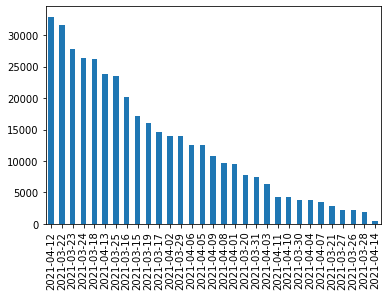

In [26]:
import matplotlib.pyplot as plt
#график по дате
pd.value_counts(vacs_df['published_at_date']).plot.bar();

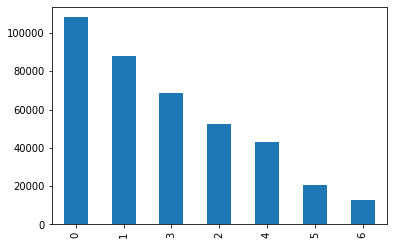

In [27]:
#график по дням недели пн и вт чаще всего вакансии размещаются
pd.value_counts(vacs_df['published_at_wd']).plot.bar();

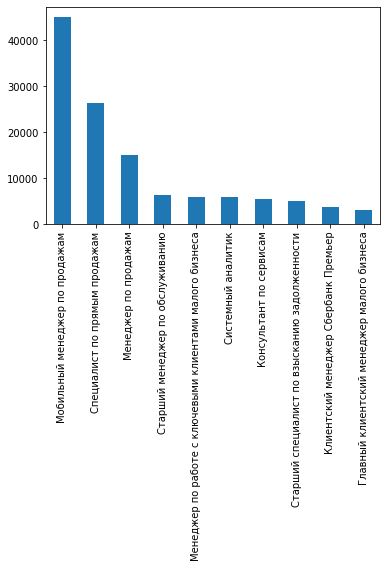

In [28]:
#Топ 10 вакансий чаще встречающихся
vacs_df['name'].value_counts().head(10).plot.bar();

In [29]:
t1=vacs_df.name.str.lower().str.contains('python')
t2=vacs_df.name.str.lower().str.contains('питон')
vacs_df[t1 | t2]

,id,name,published_at,responsibility,skills,published_at_date,published_at_wd,kod_city,city
0,41136942,Python разработчик в SberDevices (направление ...,2021-04-12 17:54:45+03:00,Развивать внутренние инструменты работы с данн...,Опыт промышленной командной разработки на Pyth...,2021-04-12,0,1,Москва
1,41137742,Middle/Senior Python разработчик в SberDevices,2021-04-12 17:54:14+03:00,Разработка нового функционала. Проектирование ...,Опыт промышленной разработки на Python3 от 3-х...,2021-04-12,0,1,Москва
16,41481283,Senior Python разработчик (Виртуальный персона...,2021-04-12 17:54:10+03:00,Решение прикладных и продуктовых задач NLP. Ра...,"Владение Python3 на уверенном уровне, достаточ...",2021-04-12,0,1,Москва
17,41481906,Senior Python-разработчик в SberDevices (коман...,2021-04-12 17:54:07+03:00,Решение прикладных и продуктовых задач NLP. Вз...,Опыт промышленной разработки на Python3 от 3-х...,2021-04-12,0,1,Москва
23,41559792,Middle/Senior Python разработчик (Виртуальный ...,2021-04-12 17:54:04+03:00,Решение прикладных и продуктовых задач NLP. Ра...,"Владение Python3 на уверенном уровне, достаточ...",2021-04-12,0,1,Москва
72,42117693,Разработчик Python,2021-04-07 12:23:04+03:00,Разработка Backend сервисов и компонент портал...,Высшее техническое/математическое образование....,2021-04-07,2,1,Москва
15,42393600,Python разработчик в SberDevices (команда анал...,2021-04-12 17:53:59+03:00,Разработка ETL пайплайна. Сбор разрозненных да...,Коммерческий опыт работы с Python от 2-х лет. ...,2021-04-12,0,1,Москва
36,42462247,Разработчик C++/Python (софт) (команда беспило...,2021-03-15 14:52:08+03:00,"Разрабатывать утилиты, ПО для взаимодействия с...",Знание C++/Python. Знание Linux на уровне опыт...,2021-03-15,0,1,Москва
54,42538861,Python-junior/стажёр,2021-03-22 09:26:17+03:00,Разработка на Python. Разработка скриптов для ...,"Основное - желание развиваться, стрессоустойчи...",2021-03-22,0,1,Москва
78,42667366,Senior Python разработчик в SberDevices (коман...,2021-04-12 17:53:56+03:00,Развитие продукта Brain. Создание новых моделе...,Опыт enterprise разработки на Python от 2-х ле...,2021-04-12,0,1,Москва


In [30]:
vacs_df[t1 | t2].skills

0     Опыт промышленной командной разработки на Pyth...
1     Опыт промышленной разработки на Python3 от 3-х...
16    Владение Python3 на уверенном уровне, достаточ...
17    Опыт промышленной разработки на Python3 от 3-х...
23    Владение Python3 на уверенном уровне, достаточ...
72    Высшее техническое/математическое образование....
15    Коммерческий опыт работы с Python от 2-х лет. ...
36    Знание C++/Python. Знание Linux на уровне опыт...
54    Основное - желание развиваться, стрессоустойчи...
78    Опыт enterprise разработки на Python от 2-х ле...
94    Создавать навыки для Виртуального ассистента. ...
99    Опыт работы с данными. Уверенное владение Pyth...
2     Опыт коммерческой разработки на Python от 1,5 ...
70    Понимает архитектурные подходы, умеет применят...
80    Уверенные знания Python 3. Желателен опыт рабо...
7     Владение Python3 на уверенном уровне, достаточ...
16    Опыт разработки на Python от 1,5 лет. Уверенно...
59    Опыт работы в области создания программног

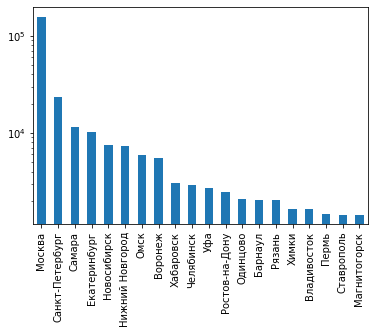

In [33]:
#Топ 20 городов с самым большим количеством вакансий
vacs_df['city'].value_counts().head(20).plot(kind='bar', logy=True);

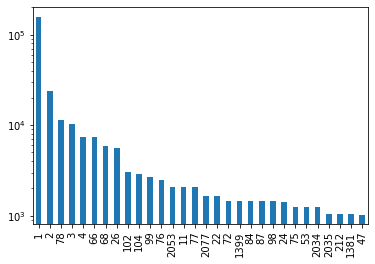

In [36]:
#Топ 30 городов с самым большим количеством вакансий по кодам, чтобы потом выбирать из списка
vacs_df['kod_city'].value_counts().head(30).plot(kind='bar', logy=True);